In [37]:
import pandas as pd
import re

df = pd.read_csv(r'C:\Users\clint\Desktop\September 10\Code\Data\Analytic\word_count\Combined_word_count.csv')
df_og=df
df.head()

,Location,Total_word_count
0,AK_Anchorage,1257897.0
1,AK_Homer,234526.0
2,AK_Kenai,417225.0
3,AK_Palmer,231411.0
4,AK_Petersburg,83206.0


In [38]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r"C:\Users\clint\Desktop\September 10\Code\Data\Analytic\location_longlat.csv"
df = pd.read_csv(file_path)

# Display the DataFrame
df

,INTPTLAT10,INTPTLON10,GEOID,statename,place,muni,restrict_NA_permit,restrict_NA_units,limit_NA_dwellings,limit_NA_dwelling_units
0,61.177549,-149.274354,203000,AK,Anchorage,AK_Anchorage,0,0,0,0
1,59.639985,-151.511234,233140,AK,Homer,AK_Homer,0,0,0,0
2,60.562274,-151.207971,238420,AK,Kenai,AK_Kenai,0,0,0,0
3,61.597369,-149.114764,258660,AK,Palmer,AK_Palmer,0,0,0,0
4,56.763209,-132.875741,260310,AK,Petersburg,AK_Petersburg,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2634,42.754671,-105.383798,5621125,WY,Douglas,WY_Douglas,0,0,0,0
2635,43.474051,-110.772193,5640120,WY,Jackson,WY_Jackson,0,0,0,0
2636,42.830923,-108.730441,5644760,WY,Lander,WY_Lander,0,0,0,0
2637,41.310240,-105.609625,5645050,WY,Laramie,WY_Laramie,0,0,0,0


In [39]:
merged_df = pd.merge(df, df_og, left_index=True, right_index=True)
merged_df
merged_df = merged_df.drop(['restrict_NA_permit', 'restrict_NA_units', 'limit_NA_dwellings', 'limit_NA_dwelling_units'], axis=1)
merged_df

,INTPTLAT10,INTPTLON10,GEOID,statename,place,muni,Location,Total_word_count
0,61.177549,-149.274354,203000,AK,Anchorage,AK_Anchorage,AK_Anchorage,1257897.0
1,59.639985,-151.511234,233140,AK,Homer,AK_Homer,AK_Homer,234526.0
2,60.562274,-151.207971,238420,AK,Kenai,AK_Kenai,AK_Kenai,417225.0
3,61.597369,-149.114764,258660,AK,Palmer,AK_Palmer,AK_Palmer,231411.0
4,56.763209,-132.875741,260310,AK,Petersburg,AK_Petersburg,AK_Petersburg,83206.0
...,...,...,...,...,...,...,...,...
2634,42.754671,-105.383798,5621125,WY,Douglas,WY_Douglas,WY_Douglas,312703.0
2635,43.474051,-110.772193,5640120,WY,Jackson,WY_Jackson,WY_Jackson,321613.0
2636,42.830923,-108.730441,5644760,WY,Lander,WY_Lander,WY_Lander,155128.0
2637,41.310240,-105.609625,5645050,WY,Laramie,WY_Laramie,WY_Laramie,422840.0


In [40]:
nan_rows = merged_df[merged_df['INTPTLAT10'].isna()]
nan_rows

,INTPTLAT10,INTPTLON10,GEOID,statename,place,muni,Location,Total_word_count
330,NaN,NaN,901430,CT,Ashford,CT_Ashford,CT_Ashford,69644.0
331,NaN,NaN,902060,CT,Avon,CT_Avon,CT_Avon,156055.0
332,NaN,NaN,904580,CT,Bethany,CT_Bethany,CT_Bethany,117743.0
333,NaN,NaN,905910,CT,Bloomfield,CT_Bloomfield,CT_Bloomfield,206930.0
334,NaN,NaN,907310,CT,Branford,CT_Branford,CT_Branford,190085.0
...,...,...,...,...,...,...,...,...
2468,NaN,NaN,5084475,VT,Williston,VT_Williston,VT_Williston,166146.0
2528,NaN,NaN,5511775,WI,Cady,WI_Cady,WI_Cady,188202.0
2535,NaN,NaN,5519475,WI,Delavan Town,WI_DelavanTown,WI_DelavanTown,296365.0
2544,NaN,NaN,5530075,WI,Grand Chute,WI_GrandChute,WI_GrandChute,241998.0


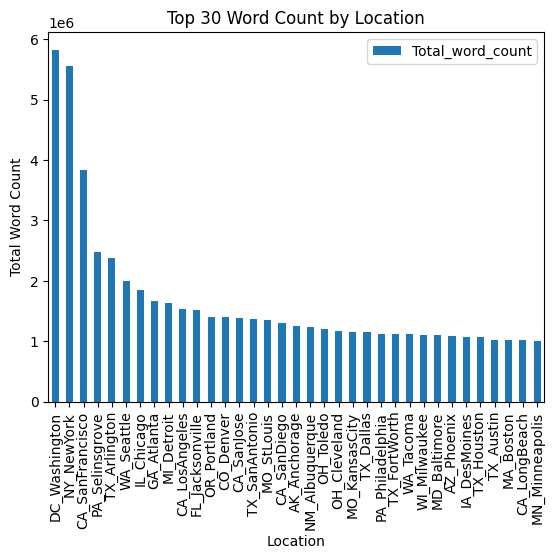

,Location,Total_word_count
0,DC_Washington,5828204.0
1,NY_NewYork,5549987.0
2,CA_SanFrancisco,3829025.0
3,PA_Selinsgrove,2481248.0
4,TX_Arlington,2374088.0
5,WA_Seattle,2002228.0
6,IL_Chicago,1839655.0
7,GA_Atlanta,1662204.0
8,MI_Detroit,1625846.0
9,CA_LosAngeles,1536926.0


In [41]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Total_word_count' in descending order and select the top 30 rows
df_top_30 = df_sorted.nlargest(35, 'Total_word_count')

# Plot the top 30 locations
df_top_30.plot(x='Location', y='Total_word_count', kind='bar')
plt.xlabel('Location')
plt.ylabel('Total Word Count')
plt.title('Top 30 Word Count by Location')
plt.show()
df_top_30

In [42]:
import pandas as pd

# Assuming df_top_30 and nan_rows are already defined DataFrames

# Filter nan_rows where 'Location' matches with df_top_30['Location']
matched_rows = nan_rows[nan_rows['Location'].isin(df_top_30['Location'])]

# Create a new DataFrame from the matched rows
missing_df = pd.DataFrame(matched_rows)

# Display the new DataFrame
missing_df

,INTPTLAT10,INTPTLON10,GEOID,statename,place,muni,Location,Total_word_count
2054,NaN,NaN,4259608,PA,Peters Township,PA_Philadelphia,PA_Philadelphia,1123737.0


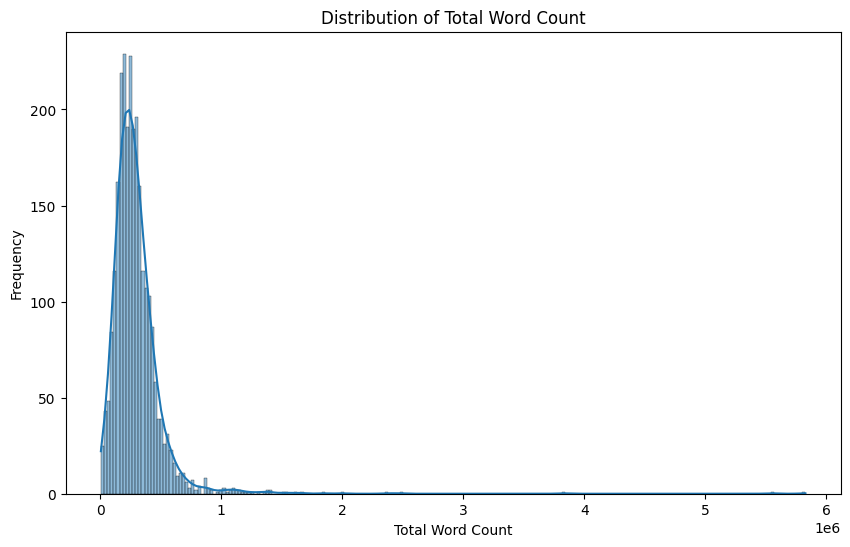

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sorted is already defined and contains the "Total_word_count" column
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted["Total_word_count"], kde=True)
plt.title('Distribution of Total Word Count')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.show()

In [44]:
df_sorted.describe()

,Total_word_count
count,2.639000e+03
mean,2.991489e+05
std,2.504274e+05
min,5.814000e+03
25%,1.815490e+05
50%,2.608790e+05
75%,3.601060e+05
max,5.828204e+06


In [45]:
# Extract the mean and standard deviation of the 'Total_word_count' row
mean_total_word_count = merged_df['Total_word_count'].mean()
std_total_word_count = merged_df['Total_word_count'].std()

# Perform the operation
result_h = mean_total_word_count + (std_total_word_count * 2)
result_l = mean_total_word_count - (std_total_word_count * 2)

# Print the result in scientific notation
print(f"{result_h:.2e}")
print(f"{result_l:.2e}")

8.00e+05
-2.02e+05


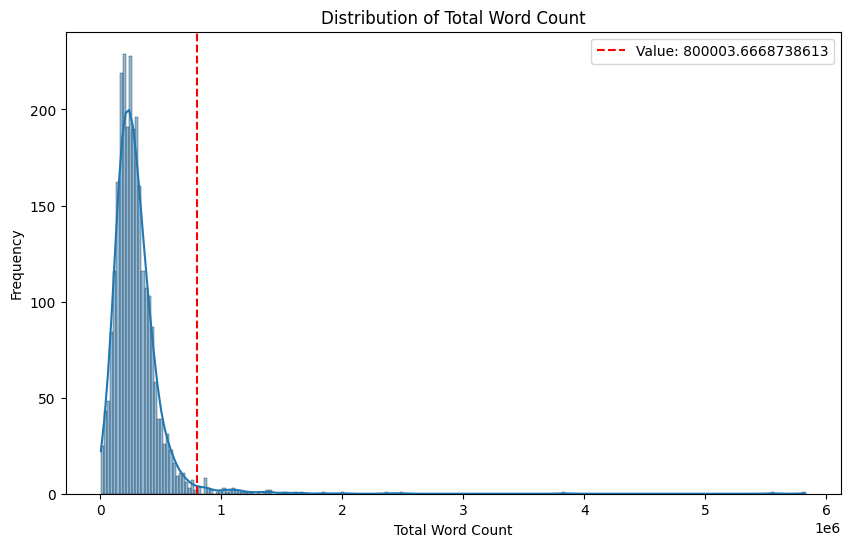

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sorted is already defined and contains the "Total_word_count" column
# Assuming result_h is already defined
# result_h = <your_value_here>

plt.figure(figsize=(10, 6))
sns.histplot(df_sorted["Total_word_count"], kde=True)

# Add a vertical line at result_h
plt.axvline(x=result_h, color='r', linestyle='--', label=f'Value: {result_h}')

plt.title('Distribution of Total Word Count')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

plt.show()

In [47]:
merged_df = merged_df.dropna()
merged_df

,INTPTLAT10,INTPTLON10,GEOID,statename,place,muni,Location,Total_word_count
0,61.177549,-149.274354,203000,AK,Anchorage,AK_Anchorage,AK_Anchorage,1257897.0
1,59.639985,-151.511234,233140,AK,Homer,AK_Homer,AK_Homer,234526.0
2,60.562274,-151.207971,238420,AK,Kenai,AK_Kenai,AK_Kenai,417225.0
3,61.597369,-149.114764,258660,AK,Palmer,AK_Palmer,AK_Palmer,231411.0
4,56.763209,-132.875741,260310,AK,Petersburg,AK_Petersburg,AK_Petersburg,83206.0
...,...,...,...,...,...,...,...,...
2634,42.754671,-105.383798,5621125,WY,Douglas,WY_Douglas,WY_Douglas,312703.0
2635,43.474051,-110.772193,5640120,WY,Jackson,WY_Jackson,WY_Jackson,321613.0
2636,42.830923,-108.730441,5644760,WY,Lander,WY_Lander,WY_Lander,155128.0
2637,41.310240,-105.609625,5645050,WY,Laramie,WY_Laramie,WY_Laramie,422840.0


In [48]:
# Ensure df_top_30 and merged_df are DataFrames
import pandas as pd

# Assuming df_top_30 and merged_df are already defined

# Create the new column "is top 30?"
merged_df['is_top_30?'] = merged_df['Location'].isin(df_top_30['Location']).astype(int)
merged_df

C:\Users\clint\AppData\Local\Temp\ipykernel_9164\3634819202.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['is_top_30?'] = merged_df['Location'].isin(df_top_30['Location']).astype(int)


,INTPTLAT10,INTPTLON10,GEOID,statename,place,muni,Location,Total_word_count,is_top_30?
0,61.177549,-149.274354,203000,AK,Anchorage,AK_Anchorage,AK_Anchorage,1257897.0,1
1,59.639985,-151.511234,233140,AK,Homer,AK_Homer,AK_Homer,234526.0,0
2,60.562274,-151.207971,238420,AK,Kenai,AK_Kenai,AK_Kenai,417225.0,0
3,61.597369,-149.114764,258660,AK,Palmer,AK_Palmer,AK_Palmer,231411.0,0
4,56.763209,-132.875741,260310,AK,Petersburg,AK_Petersburg,AK_Petersburg,83206.0,0
...,...,...,...,...,...,...,...,...,...
2634,42.754671,-105.383798,5621125,WY,Douglas,WY_Douglas,WY_Douglas,312703.0,0
2635,43.474051,-110.772193,5640120,WY,Jackson,WY_Jackson,WY_Jackson,321613.0,0
2636,42.830923,-108.730441,5644760,WY,Lander,WY_Lander,WY_Lander,155128.0,0
2637,41.310240,-105.609625,5645050,WY,Laramie,WY_Laramie,WY_Laramie,422840.0,0


In [49]:
import pandas as pd
import folium
from folium import IFrame

# Step 1: Load the data
# Assuming you have a DataFrame with columns: 'longitude', 'latitude', 'binary_variable'
data = merged_df

# Step 2: Create a base map centered on North America
m = folium.Map(location=[54.5260, -105.2551], zoom_start=4)

# Step 3: Add red points to the map first
for _, row in data.iterrows():
    if row['is_top_30?'] != 1:
        folium.CircleMarker(
            location=[row['INTPTLAT10'], row['INTPTLON10']],
            radius=5,
            color='red',
            fill=True,
            fill_color='red'
        ).add_to(m)

# Step 4: Add green points to the map last
for _, row in data.iterrows():
    if row["is_top_30?"] == 1:
        folium.CircleMarker(
            location=[row['INTPTLAT10'], row['INTPTLON10']],
            radius=5,
            color='green',
            fill=True,
            fill_color='green'
        ).add_to(m)

# Step 5: Create an HTML template with a title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Places with longest Zoning Text Word Count</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Step 6: Save the map to an HTML file
m.save('is_top_30.html')